In [363]:
#Dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

In [451]:
nyc = pd.read_csv('./resources/Boston_Winter.csv')


In [454]:
nyc["DATE"] = pd.to_datetime(nyc['DATE'])
nyc["Year"] = nyc["DATE"].dt.year
nyc["Month"] = nyc["DATE"].dt.month
nyc["Day of Month"] = nyc["DATE"].dt.day
nyc_winter = nyc[(nyc["Month"] == 1) | (nyc["Month"] == 2) | (nyc["Month"] == 12)]


Decembers = nyc_winter[nyc_winter["Month"] == 12]
nyc_winter = nyc_winter[nyc_winter["Month"] != 12]
Decembers["Year"] = Decembers["Year"] + 1

# nyc_merge = pd.merge(Decembers, nyc_winter, how="inner")
Decembers = Decembers.drop(columns = ["STATION","NAME", "DATE", "TMIN"])
nyc_winter = nyc_winter.drop(columns = ["STATION","NAME", "DATE", "TMIN"])  

nyc_merge = pd.merge(Decembers, nyc_winter, how="outer")

nyc_merge = nyc_merge[nyc_merge["TMAX"] >=60.0]
nyc_merge = nyc_merge[nyc_merge["Year"] >= 2015]



nyc_merge = nyc_merge.groupby("Year").count()

nyc_merge = nyc_merge.rename(columns = {"TMAX": "Days at Least 55F"})

nyc_merge = nyc_merge.drop(columns = ["Month", "Day of Month"])
nyc_merge2 = nyc_merge.reset_index()
nyc_merge2

,Year,Days at Least 55F
0,2015,1
1,2016,9
2,2017,4
3,2018,5
4,2019,3
5,2020,6
6,2021,2
7,2022,10
8,2023,4


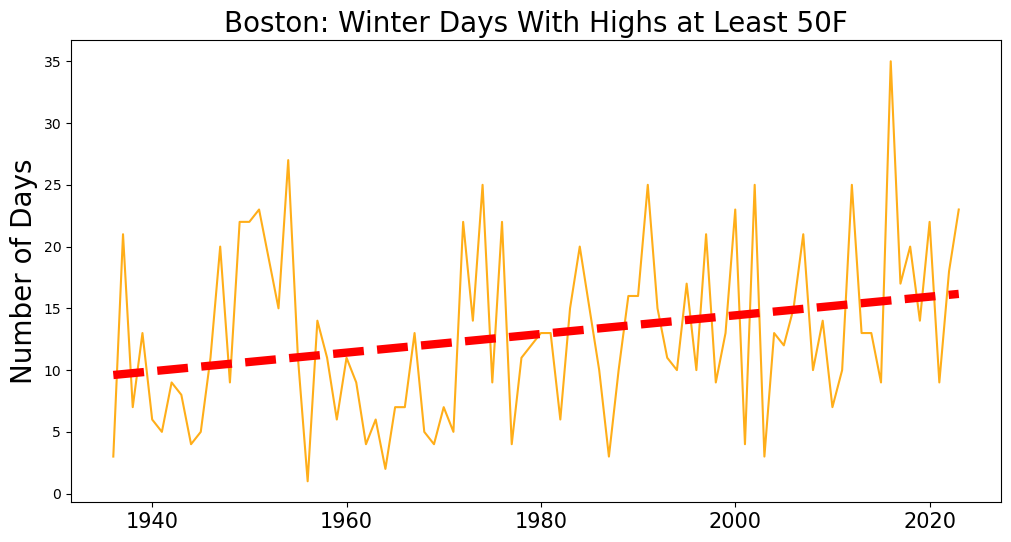

In [453]:
winter_plot = nyc_merge.plot(kind="line", figsize=(12,6), color="orange", alpha = 0.9, title="NYC: Days With Highs at least 50F Per Winter", legend=False ,xlabel="", ylabel = "Number of Days", use_index=True)
# winter_plot.spines["top"].set_color('white')
# winter_plot.spines["bottom"].set_color('white')
# winter_plot.spines["right"].set_color('white')
# winter_plot.spines["left"].set_color('white')

x_values = nyc_merge2["Year"]
y_values = nyc_merge2["Days at Least 55F"]

slope = stats.linregress(x_values,y_values)[0]
intercept = stats.linregress(x_values,y_values)[1]

y_fit = x_values * slope + intercept
plt.ylabel("Number of Days", size=20)
# plt.yticks(color="white")
plt.xticks(size=15)
plt.title("Boston: Winter Days With Highs at Least 50F", size=20)
plt.plot(x_values, y_fit, "--", color="red", linewidth=6)


plt.savefig("Warm_Boston_Winter.png")

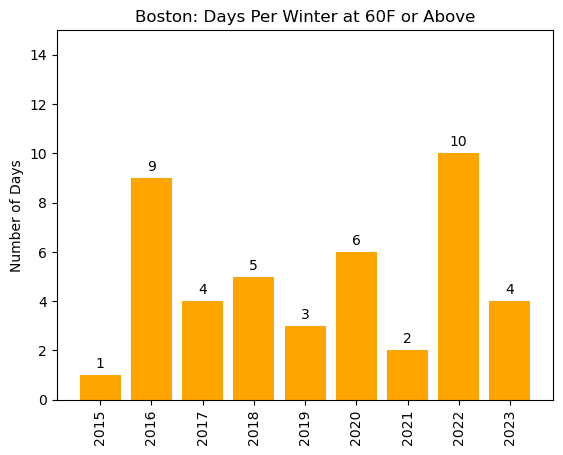

In [456]:
x=nyc_merge2["Year"]
y=nyc_merge2["Days at Least 55F"]
winter_plot = plt.bar(x,y, color="orange")
plt.xticks(x, rotation='vertical')
plt.ylim(0,15)
plt.title("Boston: Days Per Winter at 60F or Above")
plt.ylabel("Number of Days")
# winter_plot.spines["top"].set_color('white')
# winter_plot.spines["bottom"].set_color('white')
# winter_plot.spines["right"].set_color('white')
# winter_plot.spines["left"].set_color('white')

plt.bar_label(winter_plot, labels=y, label_type="edge", padding=3)
plt.savefig("Boston_60degree_Bar.png")
plt.show()